# Data Understanding

In [1]:
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("corrplot")) install.packages("corrplot")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: corrplot

corrplot 0.92 loaded



In [2]:
data <- read.csv("../data/dataframe.csv")

In [3]:
head(data)

,loan_id,loan_date,amount,duration,payments,status,frequency,trans_count,credit_count,credit_ratio,⋯,urban_ratio,average_salary,entrepreneur_rate,unemployment_rate_avg,crimes_rate_per_thousand,unemployment_growing,crimes_growing,can_afford_loan,can_pay_until,acc_age_when_loan
,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,5314,1993-07-05,96396,12,8033,-1,weekly issuance,4,4,1.0000000,⋯,81.8,9650,100,5.215,0.0550035860,1,0,1,2.502179,105
2,5316,1993-07-11,165960,36,4610,1,monthly issuance,37,17,0.4594595,⋯,73.5,8369,117,2.945,0.0261292355,1,0,1,11.325141,148
3,6863,1993-07-28,127080,60,2118,1,monthly issuance,24,15,0.6250000,⋯,53.5,8390,132,3.725,0.0478072821,1,1,1,9.571671,170
4,5325,1993-08-03,105804,36,2939,1,monthly issuance,25,13,0.5200000,⋯,58.0,8754,137,5.985,0.0554834523,1,1,1,11.668152,185
5,7240,1993-09-06,274740,60,4579,1,weekly issuance,27,13,0.4814815,⋯,100.0,12541,167,0.505,0.0004191035,1,1,1,8.985128,204
6,6687,1993-09-13,87840,24,3660,1,monthly issuance,17,14,0.8235294,⋯,41.3,8598,123,4.400,0.0816008605,1,1,1,11.980273,124


We can start by doing some simple plots in order to better understand the data that we will be dealing with.

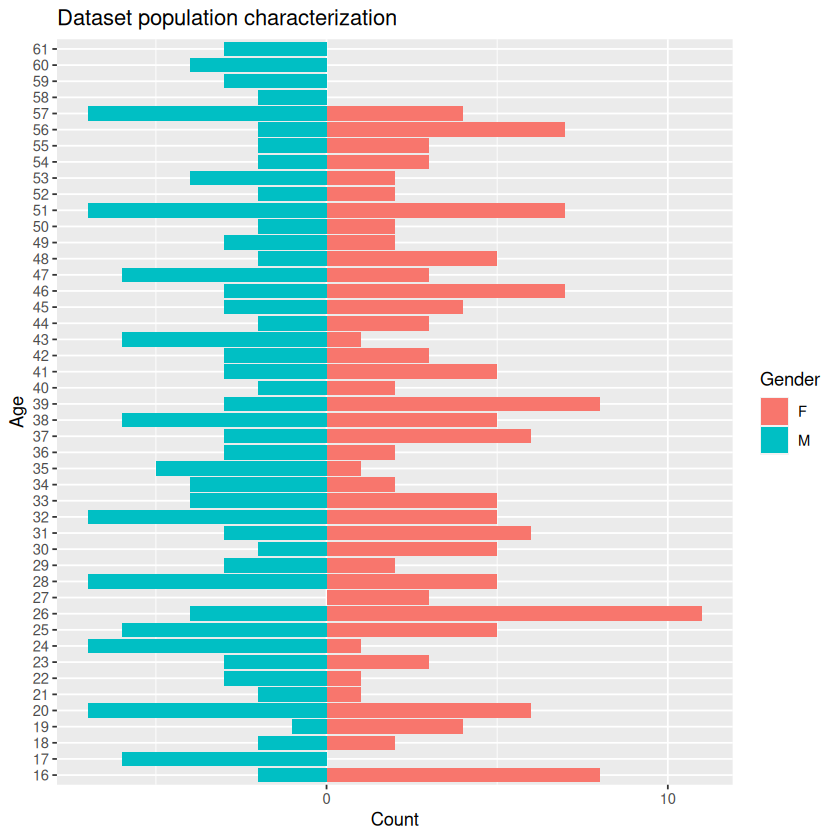

In [6]:
ggplot(data=data,aes(x=as.factor(client_age),fill=as.factor(gender))) + 
  geom_bar(data=subset(data,gender=="F")) + 
  geom_bar(data=subset(data,gender=="M"),aes(y=after_stat(count)*(-1))) + 
  scale_y_continuous(breaks=seq(-40,40,10),labels=abs(seq(-40,40,10))) + 
  labs(fill="Gender", x="Age", y="Count", title="Dataset population characterization") +
  coord_flip()

We can see that this dataset is composed of clients between the ages of 16 and 61, having about the same number of male and female.

Since the target variable is the "status", we will try to find how other variables can influence it's result.

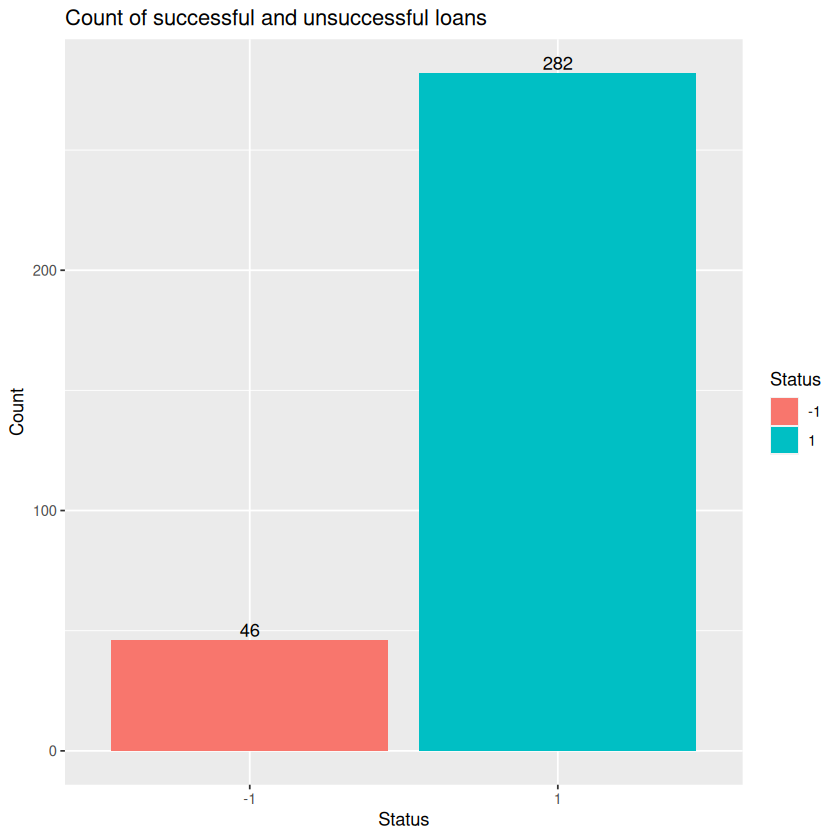

In [11]:
loan_frq <- data %>%
  count(status)

ggplot(loan_frq, aes(x=as.factor(status), y=n, fill=as.factor(status))) + 
  labs(fill="Status", x="Status", y="Count", title="Count of successful and unsuccessful loans") +
  geom_bar(stat = "identity") +
  geom_text(aes(label=n), position=position_dodge(width=0.9), vjust=-0.25)

This simple graph shows the number of successful (1) and unsuccessful (-1) loans. We can now see that there is a very small number of unssuccessful loans when compared to successful. That is something we need to keep in mind for the next steps, as it makes the dataset unbalanced. Possible solutions are to replicate the unsuccessfull loans, reduce successfull loans or create unsuccessfull loans (SMOTE).


Now we can plot some data to try and find correlations between the loan status and other attributes.

Let's start by seeing if there is any correlation between the loan duration and amount and the status.

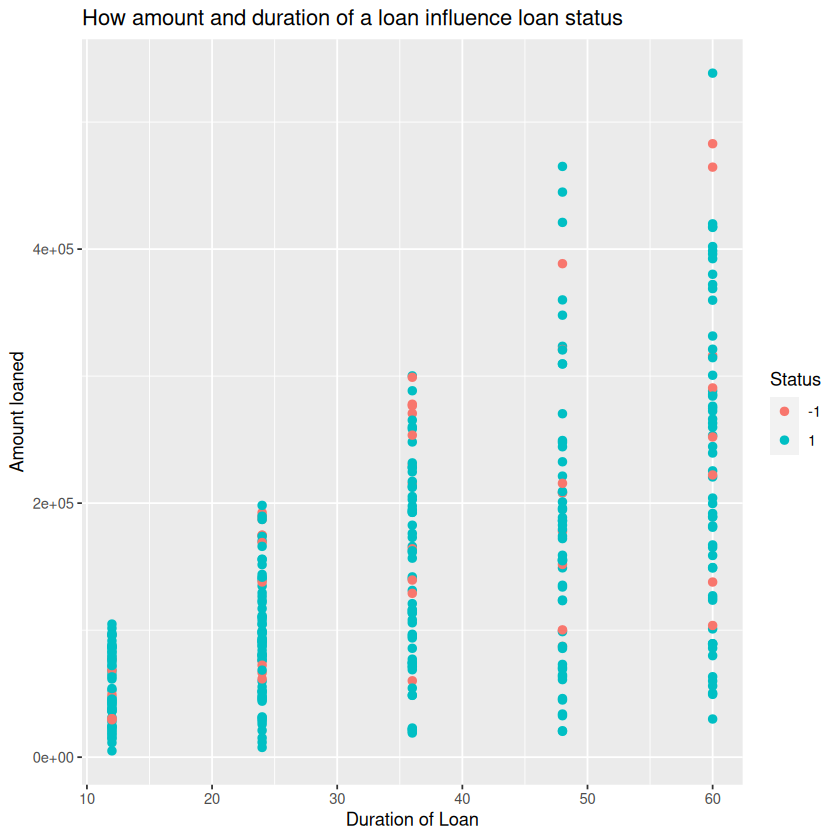

In [21]:
ggplot(data, aes(x=duration, y=amount, color=as.factor(status))) + 
    labs(color="Status", x="Duration of Loan", y="Amount loaned", title="How amount and duration of a loan influence loan status") +
    geom_point(size=2)